# Desafío Empresarial: Análisis de Cohortes para los Pagos de Ironhack (Proyecto 1)

##### Setup: cargar librerías necesarias

In [977]:
# Importing the Warnings library for better presentation
import warnings

# Importing the NumPy library for numerical operations (as np)
import numpy as np
# Importing the Pandas library for data manipulation and analysis (as pd)
import pandas as pd

# Importing the Seaborn library for advanced data visualization (as sns)
import seaborn as sns
# Importing the Matplotlib library for basic plotting functionalities (as plt)
import matplotlib.pyplot as plt

from IPython.display import display_html 

#####  Setup: ajustes de visualización para los gráficos

In [978]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [979]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

## Análisis Exploratorio de Datos (EDA)

### Carga inicial de datos

In [980]:
cash_orig = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')

In [981]:
fees_orig = pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

### Visión general de datos

In [982]:
cash_orig.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [983]:
fees_orig.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [984]:
cash_orig.shape # 23970 peticiones de cash

(23970, 16)

In [985]:
fees_orig.shape # 21061 fees

(21061, 13)

In [986]:
# Column names
print(f"Column Names: {cash_orig.columns}")
print(f"Column Names: {fees_orig.columns}")

Column Names: Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')
Column Names: Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')


### Variables de trabajo

In [987]:
fees = fees_orig.copy()
cash = cash_orig.copy()

In [988]:
# Renombrar 'id' a 'cash_request_id' para mayor claridad (y para el merge posterior con fees)
cash.rename(columns={'id': 'cash_request_id'}, inplace=True)

In [989]:
#cash = cash[['cash_request_id', 'amount', 'status', 'created_at', 'user_id', 'deleted_account_id']]
cash.head()

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


### Unificación de ID de usuario

In [990]:
# Ver NA en columna 'user_id'
cash[cash['user_id'].notna()].nunique() # 21867 válidos
cash[cash['user_id'].isna()].nunique() # 2103 Nan
# Comprobación: 21867 válidos + 2103 NaN = 23970 filas

# Comprobar que 'user_id' y 'deteled_account_id' son complementarios
cash[cash['user_id'].isna() & cash['deleted_account_id'].isna()] # Empty dataframe -> Siempre tenemos un valor válido en una de las dos columnas

# Comprobar solapamientos
cash[cash['user_id'].notna() & cash['deleted_account_id'].notna()] # La fila crid=280 tiene user_id=3161 y a la vez deleted_account_id=262

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7313,280,100.0,money_back,2019-12-21 16:01:38.756985+00,2020-11-04 12:55:32.000656+00,3161.0,2019-12-22 13:48:26+00,262.0,2020-01-16 23:00:00+00,2019-12-24,2020-11-23 10:31:54.598593+00,regular,NaN,completed,2020-03-20 14:12:53.160242+00,2020-03-31 16:05:16.427692+00


In [991]:
# Nueva columna 'id_usuario' a partir de user_id + deleted_account_id
cash['id_usuario'] = cash['user_id'].fillna(cash['deleted_account_id'])
# Conversión de float a int
cash['id_usuario'] = cash['id_usuario'].astype(int)

### Tratamiento de fechas

In [992]:
# Convertir 'created_at' a tipo datetime
print(cash['created_at'].dtypes)
cash['created_at'] = pd.to_datetime(cash['created_at'])
print(cash['created_at'].dtypes)

object
datetime64[ns, UTC]


### Obtener cohortes

In [993]:
grouped1st = cash.pivot_table(
    values = "created_at",
    index = "id_usuario",
    aggfunc = "min"
)
warnings.filterwarnings('ignore', category=UserWarning)
grouped1st['cohorte'] = grouped1st['created_at'].dt.to_period('M') #UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
warnings.resetwarnings()
grouped1st.head()

,created_at,cohorte
id_usuario,,
34,2020-04-20 15:50:21.187257+00:00,2020-04
35,2019-12-13 20:27:38.106778+00:00,2019-12
47,2019-11-19 13:57:53.511561+00:00,2019-11
52,2019-12-17 09:01:12.584634+00:00,2019-12
53,2019-12-21 11:39:03.844436+00:00,2019-12


In [994]:
# Dos maneras de calcular lo mismo:
grouped1st.index.shape # (11793,) usuarios distintos
grouped1st.value_counts().sum() # 11793 usuarios distintos

11793

In [995]:
# Añadir dato 'cohorte' a tabla de trabajo
cash_cohorts = pd.merge(cash, grouped1st[['cohorte']], on='id_usuario')
cash_cohorts.head()


,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_usuario,cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,804,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,231,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,191,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,761,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,7686,2020-05


In [996]:
# Comprobar que la diferencia es sólo 1 columna adicional
print(cash.shape)
print(cash_cohorts.shape)

(23970, 17)
(23970, 18)


In [997]:
cash_cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   cash_request_id             23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  object             
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  object             
 9   cash_request_received_date  16289 non-null  object             
 10  money_back_date             16543 non-null  object        

In [998]:
# Convertir cohorte a tipo str para poder agrupar y graficar (el tipo de datos period[M] no lo permite)
cash_cohorts['cohorte'] = cash_cohorts['cohorte'].astype(str)
cash_cohorts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   cash_request_id             23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  object             
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  object             
 9   cash_request_received_date  16289 non-null  object             
 10  money_back_date             16543 non-null  object        

In [999]:
# Número de usuarios por cohorte
users_by_cohort = cash_cohorts.groupby('cohorte')['id_usuario'].nunique().reset_index()
users_by_cohort.rename(columns={'id_usuario': 'num_usuarios'}, inplace=True)
print(users_by_cohort)

    cohorte  num_usuarios
0   2019-11             1
1   2019-12           254
2   2020-01           106
3   2020-02            90
4   2020-03            86
5   2020-04           246
6   2020-05           432
7   2020-06          1540
8   2020-07          1482
9   2020-08           728
10  2020-09          1950
11  2020-10          4802
12  2020-11            76


In [1000]:
# Comprobación
print(cash['id_usuario'].nunique())
print(users_by_cohort['num_usuarios'].sum()) # 11793 total usuarios

11793
11793


In [1001]:
users_by_cohort.set_index('cohorte', inplace=True)
print(users_by_cohort.index)

Index(['2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
       '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
       '2020-11'],
      dtype='object', name='cohorte')


<Figure size 1000x600 with 0 Axes>

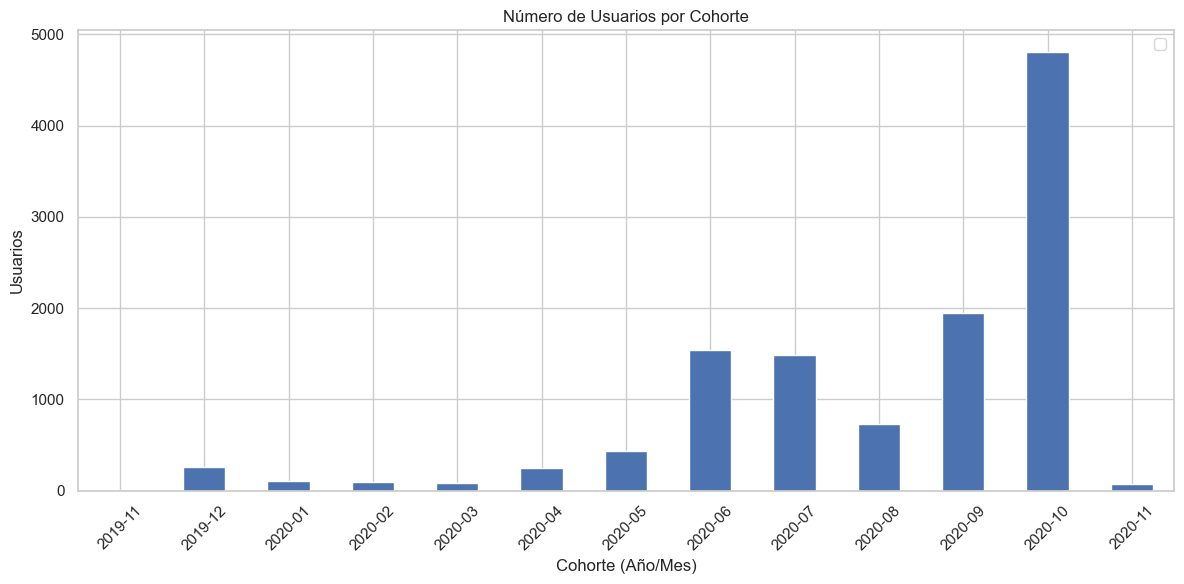

In [1013]:
# Gràfico de barras para visualizar el número de usuarios por cohorte
plt.figure(figsize=(10, 6))
#users_by_cohort.plot(kind='line', marker='o')
users_by_cohort.plot(kind='bar')
plt.title('Número de Usuarios por Cohorte')
plt.xlabel('Cohorte (Año/Mes)')
plt.ylabel('Usuarios')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend([])
plt.tight_layout()
plt.show()

## 1. Frecuencia de uso del servicio

### 1.1. Peticiones por cohorte

In [1003]:
# Número de peticiones de servicio por cohorte
requests_by_cohort = cash_cohorts.groupby('cohorte')['cash_request_id'].nunique().reset_index()
requests_by_cohort.rename(columns={'cash_request_id':'num_requests'}, inplace=True)
print(requests_by_cohort)

    cohorte  num_requests
0   2019-11             8
1   2019-12          1080
2   2020-01           354
3   2020-02           441
4   2020-03           371
5   2020-04           952
6   2020-05          1660
7   2020-06          5266
8   2020-07          4147
9   2020-08          1632
10  2020-09          2925
11  2020-10          5058
12  2020-11            76


In [1004]:
# Cambiar índice para poder graficar
requests_by_cohort.set_index('cohorte', inplace=True)
print(requests_by_cohort.index)

Index(['2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
       '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
       '2020-11'],
      dtype='object', name='cohorte')


In [1005]:
requests_by_cohort

,num_requests
cohorte,
2019-11,8
2019-12,1080
2020-01,354
2020-02,441
2020-03,371
2020-04,952
2020-05,1660
2020-06,5266
2020-07,4147


In [1006]:
# Comprobación
requests_by_cohort['num_requests'].sum() # 23970, coincide con el total de filas en la tabla

23970

<Figure size 1000x600 with 0 Axes>

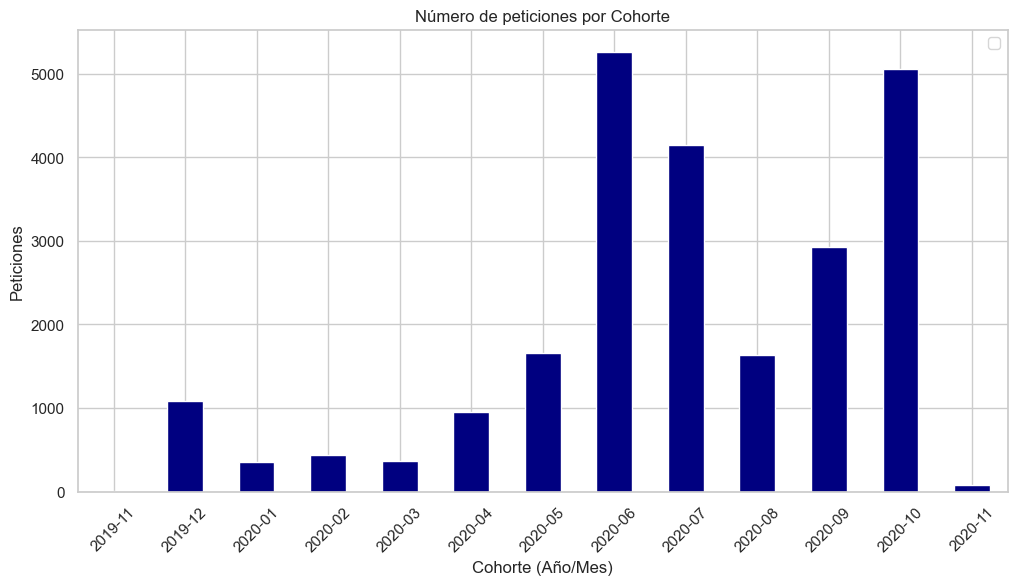

In [1014]:
# Crear un gráfico de barras para visualizar el número de requests por cohorte
plt.figure(figsize=(10, 6))
requests_by_cohort.plot(kind='bar', color='navy')
plt.title('Número de peticiones por Cohorte')
plt.xlabel('Cohorte (Año/Mes)')
plt.ylabel('Peticiones')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend([])
plt.show()

### 1.2. Frecuencia de uso

In [1008]:
# Añadir columna 'created_at_month' para determinar el mes de creación de cada petición
warnings.filterwarnings('ignore', category=UserWarning)
cash_cohorts['created_at_month'] = cash_cohorts['created_at'].dt.to_period('M')
warnings.resetwarnings()

subset = ['cash_request_id','created_at_month','cohorte','id_usuario']
cash_cohorts[subset]

,cash_request_id,created_at_month,cohorte,id_usuario
0,5,2019-12,2019-12,804
1,70,2019-12,2019-12,231
2,7,2019-12,2019-12,191
3,10,2019-12,2019-12,761
4,1594,2020-05,2020-05,7686
...,...,...,...,...
23965,20616,2020-10,2020-06,13681
23966,25243,2020-10,2020-10,30367
23967,22357,2020-10,2020-10,82122
23968,20256,2020-10,2020-10,64517


In [1009]:
# Frecuencia de uso del servicio por cohorte
frequency_by_cohort = cash_cohorts[subset].groupby(['created_at_month','cohorte'])['cash_request_id'].count().reset_index()
frequency_by_cohort.sort_values(by=['created_at_month','cohorte'])
frequency_by_cohort.set_index(['created_at_month','cohorte'], inplace=True)
frequency_by_cohort.rename(columns={'cash_request_id': 'num_requests'}, inplace=True)
frequency_by_cohort.iloc[0:50]

num_requests
created_at_month cohorte              
2019-11          2019-11             1
2019-12          2019-11             1
                 2019-12           288
2020-01          2019-12           106
                 2020-01           117
2020-02          2019-12            63
                 2020-01            24
                 2020-02            97
2020-03          2019-12            79
                 2020-01            17
                 2020-02            49
                 2020-03            99
2020-04          2019-11             1
                 2019-12            82
                 2020-01            35
                 2020-02            49
                 2020-03            42
                 2020-04           264
2020-05          2019-11             1
                 2019-12            86
                 2020-01            31
                 2020-02            45
                 2020-03            46
                 2020-04           150
                 2020-05           478
2020-06          2019-12            91
                 2020-01            29
                 2020-02            45
                 2020-03            47
                 2020-04           151
                 2020-05           318
                 2020-06          1934
2020-07          2019-12            72
                 2020-01            31
                 2020-02            45
                 2020-03            40
                 2020-04           116
                 2020-05           274
                 2020-06          1027
                 2020-07          1996
2020-08          2019-11             1
                 2019-12            84
                 2020-01            22
                 2020-02            44
                 2020-03            36
                 2020-04           107
                 2020-05           232
                 2020-06           957
                 2020-07           941
                 2020-08           993

In [1010]:
# Comprobación: la suma debe dar el número total de peticiones, o sea 23970
frequency_by_cohort['num_requests'].sum()

23970

In [1042]:
# Unstack multi-index para gráfico
requests_for_plot = frequency_by_cohort.unstack()

# Preparar leyenda para gráfico
legend_cohortes = [t[1] for t in requests_for_plot.columns]


<Figure size 1000x600 with 0 Axes>

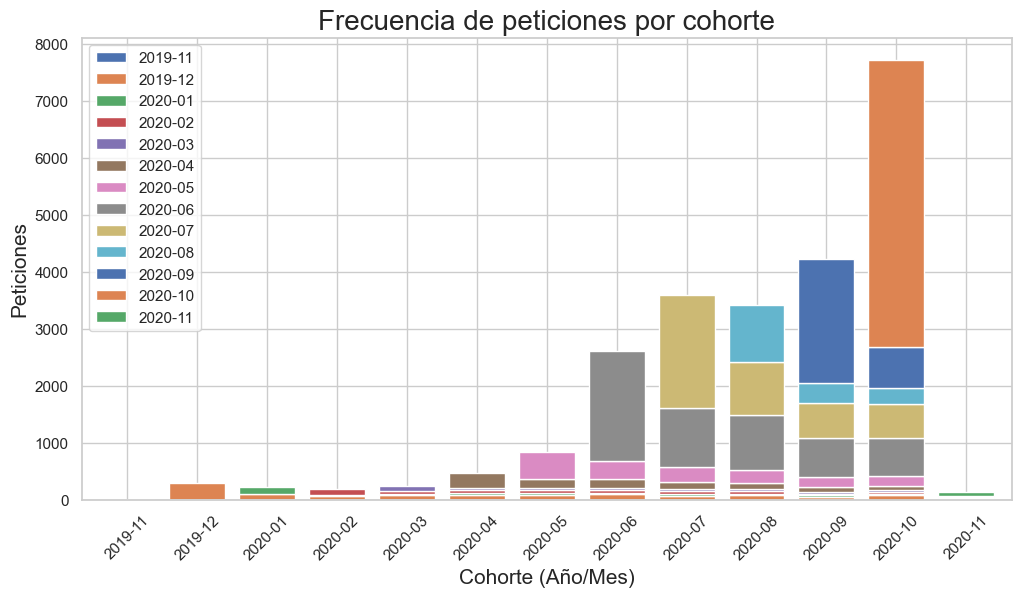

In [1153]:
# Crear gráfico!!!
plt.figure(figsize=(10, 6))
#requests_for_plot.plot(kind="line", marker="o")
#requests_for_plot.plot(kind="bar", width=1)
requests_for_plot.plot(kind="bar", stacked=True, width=0.8)
plt.title("Frecuencia de peticiones por cohorte", fontsize=20)
plt.xlabel("Cohorte (Año/Mes)", fontsize=15)
plt.ylabel("Peticiones", fontsize=15)
plt.xticks(rotation=45)
plt.legend(legend_cohortes)
plt.show()

## 2. Tasa de incidentes

### Explorar tabla fees

In [825]:
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [826]:
fees.shape

(21061, 13)

In [827]:
fees.info() # cash_request_id  21057 non-null  float64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [828]:
fees[fees['cash_request_id'].isna()] # Hay 4 valores NaN en columna 'cash_request_id'!!!

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1911,2990,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11164,2020-08-06 22:42:34.525373+00,2020-11-04 16:01:17.296048+00,NaN,NaN,NaN,after
1960,3124,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11444,2020-08-08 06:33:06.244651+00,2020-11-04 16:01:08.332978+00,NaN,NaN,NaN,after
4605,5185,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11788,2020-08-26 09:39:37.362933+00,2020-11-04 16:01:36.492576+00,NaN,NaN,NaN,after
11870,3590,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 12212,2020-08-12 14:20:06.657075+00,2020-11-04 16:01:53.106416+00,NaN,NaN,NaN,after


In [829]:
# Recuperar el valor de 'cash_request_id' a partir de 'reason', para esas 4 filas
valores_id = fees[fees['cash_request_id'].isna()]['id'] # 'id' = [2990,3124,5185,3590]
valores_id
fees[fees['id'].isin(valores_id)]

extract_crid = lambda x: float(x.split(" ")[-1])
crid_values = fees[fees['cash_request_id'].isna()]['reason'].transform(extract_crid)
crid_values

reason_dic = { 'cash_request_id' : crid_values}

fees.fillna(reason_dic, inplace=True)

# Comprobación
fees[fees['id'].isin(valores_id)]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1911,2990,11164.0,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11164,2020-08-06 22:42:34.525373+00,2020-11-04 16:01:17.296048+00,NaN,NaN,NaN,after
1960,3124,11444.0,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11444,2020-08-08 06:33:06.244651+00,2020-11-04 16:01:08.332978+00,NaN,NaN,NaN,after
4605,5185,11788.0,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11788,2020-08-26 09:39:37.362933+00,2020-11-04 16:01:36.492576+00,NaN,NaN,NaN,after
11870,3590,12212.0,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 12212,2020-08-12 14:20:06.657075+00,2020-11-04 16:01:53.106416+00,NaN,NaN,NaN,after


In [830]:
# Conversión de float a int, para poder enlazarlo con la tabla cash
fees['cash_request_id'] = fees['cash_request_id'].astype(int)

In [831]:
fees['type'].value_counts()

type
instant_payment    11099
postpone            7766
incident            2196
Name: count, dtype: int64

In [832]:
cash['status'].value_counts()

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

In [833]:
cash[cash['cash_request_id']==4410]

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_usuario
11692,4410,100.0,money_back,2020-06-20 17:40:40.070040+00:00,2020-12-18 13:09:11.318129+00,NaN,2020-06-22 15:36:51.105835+00,7731.0,2020-07-30 22:00:00+00,2020-06-25,2020-08-28 13:24:55.619705+00,regular,NaN,completed,2020-08-06 22:27:53.590033+00,2020-08-28 13:24:55.635247+00,7731


In [787]:
cash[cash['cash_request_id']==4410]

,cash_request_id,amount,status,created_at,user_id,deleted_account_id,id_usuario
11692,4410,100.0,money_back,2020-06-20 17:40:40.070040+00:00,NaN,7731.0,7731


In [785]:
fees['cash_request_id'].value_counts().head(20) # Algunas fees corresponden al mismo cash_request_id
#fees[fees['cash_request_id']==12225].sort_values(by='created_at')
#fees[fees['cash_request_id']==5006].sort_values(by='created_at')
fees[fees['cash_request_id']==4410].sort_values(by='created_at')

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
16287,436,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-06-23 08:20:52.073333+00,2020-10-13 14:25:15.756663+00,NaN,2020-06-30 22:00:00+00,2020-07-30 22:00:00+00,after
16288,437,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-06-23 08:20:52.081331+00,2020-10-13 14:25:15.757952+00,NaN,2020-06-30 22:00:00+00,2020-07-30 22:00:00+00,after
16289,438,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-06-23 08:20:52.089237+00,2020-10-13 14:25:15.759127+00,NaN,2020-06-30 22:00:00+00,2020-07-30 22:00:00+00,after
16291,440,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-06-23 08:20:52.104567+00,2020-10-13 14:25:15.761493+00,NaN,2020-06-30 22:00:00+00,2020-07-27 22:00:00+00,after
16297,453,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-06-23 08:20:52.230431+00,2020-10-13 14:25:15.77132+00,NaN,2020-06-30 22:00:00+00,2020-07-30 22:00:00+00,after
1467,539,4410,postpone,accepted,NaN,5.0,Postpone Cash Request 4410,2020-06-23 20:51:56.356676+00,2020-10-13 14:25:01.302378+00,2020-06-23 20:52:01.070059+00,2020-06-30 22:00:00+00,2020-07-30 22:00:00+00,before
16575,1160,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-07-07 20:00:25.017765+00,2020-10-13 14:25:16.148192+00,NaN,2020-07-30 22:00:00+00,2020-08-29 22:00:00+00,after
16253,1194,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-07-08 13:27:17.138729+00,2020-10-13 14:25:15.701722+00,NaN,2020-07-30 22:00:00+00,2020-08-29 22:00:00+00,after
16659,1350,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-07-14 03:21:20.853017+00,2020-10-13 14:25:16.24635+00,NaN,2020-07-30 22:00:00+00,2020-08-29 22:00:00+00,after
15711,1378,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-07-15 00:24:09.36616+00,2020-10-13 14:25:14.852209+00,NaN,2020-07-30 22:00:00+00,2020-08-29 22:00:00+00,after


### Comprobar relación entre tablas cash y fees

In [724]:
# Comprobar relación entre ambas tablas, que debería ser a través de la columna 'cash_request_id'
#fees[fees['cash_request_id']==1594] # Primeras cinco filas de cash: 5 70 7 10 1594
#fees[fees['cash_request_id'].isin([5,70,7,10,1594])]
#cash_cohorts['cash_request_id'].values[0:100]
#fees[fees['cash_request_id'].isin(cash_cohorts['cash_request_id'].values)].shape
cash_cohorts[~cash_cohorts['cash_request_id'].isin(fees['cash_request_id'].values)].shape # 11037 entradas en tabla cash NO tienen su correspondiente en la tabla fees, basándonos en 'cash_request_id'
cash_cohorts[~cash_cohorts['cash_request_id'].isin(fees['cash_request_id'].values)].sample(50)
#cash_cohorts[~cash_cohorts['cash_request_id'].isin(fees['cash_request_id'].values)]['status'].value_counts()

status
rejected                 6568
money_back               4352
direct_debit_rejected      83
canceled                   29
active                      3
direct_debit_sent           2
Name: count, dtype: int64

In [725]:
fees[~fees['cash_request_id'].isin(cash_cohorts['cash_request_id'].values)].shape # 4 entradas en tabla fees NO tienen su correspondiente en la tabla cash
fees[~fees['cash_request_id'].isin(cash_cohorts['cash_request_id'].values)].head()
cash_cohorts[cash_cohorts['cash_request_id'].isin([11164, 11444, 11788, 12212])] # Confirmado, esas 4 entradas (para las que hemos repoblado 'cash_request_id') no están en la tabla cash

,cash_request_id,amount,status,created_at,user_id,deleted_account_id,id_usuario,cohorte,created_at_month


In [726]:
cash_cohorts.columns

Index(['cash_request_id', 'amount', 'status', 'created_at', 'user_id',
       'deleted_account_id', 'id_usuario', 'cohorte', 'created_at_month'],
      dtype='object')

In [727]:
fees.columns

Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')

In [728]:
# Renombrar columnas para que no nos aparezcan _x o _y al hacer el merge
#fees.rename(columns={'id': 'fee_id', 'status': 'fee_status', 'created_at' : 'fee_created_at'}, inplace=True)

In [729]:
# Seleccionar sólo columnas que interesan para la tasa de incidencias
#fees = fees[['fee_id', 'cash_request_id', 'type', 'fee_status', 'fee_created_at','total_amount']]

In [730]:
fees.head()

,fee_id,cash_request_id,type,fee_status,fee_created_at,total_amount
0,6537,14941,instant_payment,rejected,2020-09-07 10:47:27.42315+00,5.0
1,6961,11714,incident,accepted,2020-09-09 20:51:17.998653+00,5.0
2,16296,23371,instant_payment,accepted,2020-10-23 10:10:58.352972+00,5.0
3,20775,26772,instant_payment,accepted,2020-10-31 15:46:53.643958+00,5.0
4,11242,19350,instant_payment,accepted,2020-10-06 08:20:17.170432+00,5.0


### Unir tablas cash y fees

In [731]:
print(cash_cohorts.shape)
print(fees.shape)

(23970, 9)
(21061, 6)


In [841]:
# Añadir prefijo a columnas tabla fees
fees_prefixed = fees.add_prefix('fee_')

In [845]:
#merged = pd.merge(cash_cohorts, fees_prefixed, left_on='cash_request_id', right_on='fee_cash_request_id') # 21057 (= todo cash - 4 filas)
merged = pd.merge(cash_cohorts, fees_prefixed, left_on='cash_request_id', right_on='fee_cash_request_id', how='outer') # 32098
print(merged.shape)
merged.head()

(32098, 32)


,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,fee_status,fee_category,fee_total_amount,fee_reason,fee_created_at,fee_updated_at,fee_paid_at,fee_from_date,fee_to_date,fee_charge_moment
0,3.0,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00,47.0,2019-11-20 12:16:50+00,NaN,2019-12-05 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,100.0,money_back,2019-12-09 14:47:35.190714+00:00,2020-11-04 12:54:52.120014+00,NaN,2019-12-09 14:58:28+00,1309.0,2019-12-16 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00:00,2020-12-18 22:47:47.993817+00,812.0,2019-12-11 09:40:33+00,NaN,2020-02-05 23:00:00+00,2019-12-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [847]:
merged.columns

Index(['cash_request_id', 'amount', 'status', 'created_at', 'updated_at',
       'user_id', 'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'id_usuario', 'cohorte', 'created_at_month', 'fee_id',
       'fee_cash_request_id', 'fee_type', 'fee_status', 'fee_category',
       'fee_total_amount', 'fee_reason', 'fee_created_at', 'fee_updated_at',
       'fee_paid_at', 'fee_from_date', 'fee_to_date', 'fee_charge_moment'],
      dtype='object')

In [879]:
subset_incidents = ['cash_request_id','created_at','transfer_type','status','recovery_status','fee_id','fee_created_at','fee_type','fee_status','fee_charge_moment']

In [880]:
merged[merged['cash_request_id']==4410].loc[:, subset_incidents].sort_values(by='fee_created_at')

,cash_request_id,created_at,transfer_type,status,recovery_status,fee_id,fee_created_at,fee_type,fee_status,fee_charge_moment
4785,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,436.0,2020-06-23 08:20:52.073333+00,postpone,cancelled,after
4786,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,437.0,2020-06-23 08:20:52.081331+00,postpone,cancelled,after
4787,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,438.0,2020-06-23 08:20:52.089237+00,postpone,cancelled,after
4788,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,440.0,2020-06-23 08:20:52.104567+00,postpone,cancelled,after
4789,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,453.0,2020-06-23 08:20:52.230431+00,postpone,cancelled,after
4768,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,539.0,2020-06-23 20:51:56.356676+00,postpone,accepted,before
4790,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,1160.0,2020-07-07 20:00:25.017765+00,postpone,cancelled,after
4784,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,1194.0,2020-07-08 13:27:17.138729+00,postpone,cancelled,after
4791,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,1350.0,2020-07-14 03:21:20.853017+00,postpone,cancelled,after
4771,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,1378.0,2020-07-15 00:24:09.36616+00,postpone,cancelled,after


In [898]:
#merged[merged['recovery_status'].isna()].loc[:, subset_incidents].head(50)
incidents = merged[(merged['recovery_status'].notna()) & (merged['fee_type']=='incident')].groupby(['cohorte','fee_type'])['cash_request_id'].nunique().reset_index()
incidents.rename(columns = {'cash_request_id' : 'num_incidents'}, inplace=True)
print(incidents.head(50))

    cohorte  fee_type  num_incidents
0   2019-12  incident             34
1   2020-01  incident              9
2   2020-02  incident             15
3   2020-03  incident             22
4   2020-04  incident             69
5   2020-05  incident            156
6   2020-06  incident            542
7   2020-07  incident            405
8   2020-08  incident            127
9   2020-09  incident            195
10  2020-10  incident             23


In [895]:
requests_by_cohort.head(50)

,num_requests
cohorte,
2019-11,8
2019-12,1080
2020-01,354
2020-02,441
2020-03,371
2020-04,952
2020-05,1660
2020-06,5266
2020-07,4147


In [901]:

merged_incidents = pd.merge(requests_by_cohort, incidents, on='cohorte', how='outer')
print(merged_incidents.shape)
merged_incidents.head(20)


(13, 4)


,cohorte,num_requests,fee_type,num_incidents
0,2019-11,8,NaN,NaN
1,2019-12,1080,incident,34.0
2,2020-01,354,incident,9.0
3,2020-02,441,incident,15.0
4,2020-03,371,incident,22.0
5,2020-04,952,incident,69.0
6,2020-05,1660,incident,156.0
7,2020-06,5266,incident,542.0
8,2020-07,4147,incident,405.0
9,2020-08,1632,incident,127.0


In [903]:
merged_incidents.fillna({'num_incidents': 0}, inplace=True)
merged_incidents['incident_rate'] = (merged_incidents['num_incidents'] / merged_incidents['num_requests']) * 100
merged_incidents.head(20)

,cohorte,num_requests,fee_type,num_incidents,incident_rate
0,2019-11,8,NaN,0.0,0.000000
1,2019-12,1080,incident,34.0,3.148148
2,2020-01,354,incident,9.0,2.542373
3,2020-02,441,incident,15.0,3.401361
4,2020-03,371,incident,22.0,5.929919
5,2020-04,952,incident,69.0,7.247899
6,2020-05,1660,incident,156.0,9.397590
7,2020-06,5266,incident,542.0,10.292442
8,2020-07,4147,incident,405.0,9.766096
9,2020-08,1632,incident,127.0,7.781863


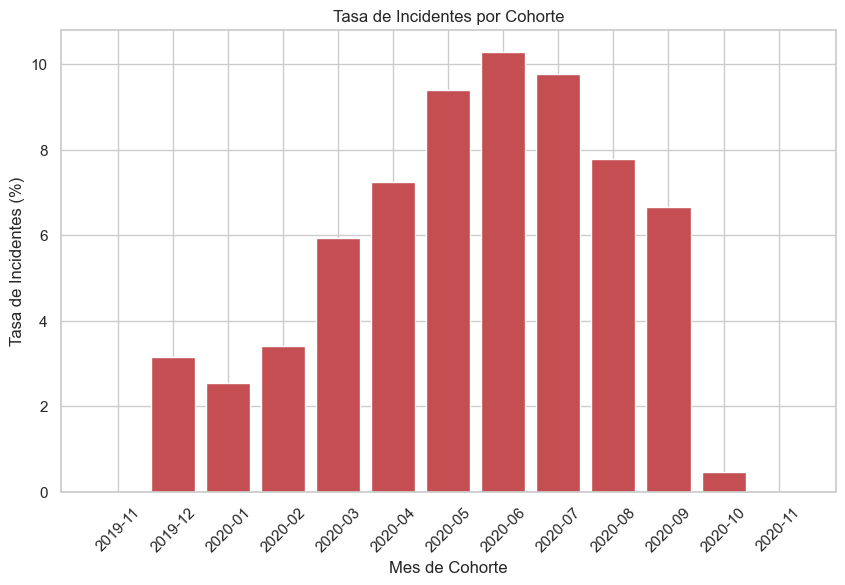

In [907]:
# Graficar la tasa de incidentes por cohorte
plt.figure(figsize=(10, 6))
plt.bar(merged_incidents['cohorte'].astype(str), merged_incidents['incident_rate'], color='r')
plt.title('Tasa de Incidentes por Cohorte')
plt.xlabel('Mes de Cohorte')
plt.ylabel('Tasa de Incidentes (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 3. Ingresos generados por cohorte

### Exploración inicial

In [1163]:
# merged.head()
# merged.dtypes
fees.dtypes
# fees.sample(20)
# fees['status'].value_counts()
# fees['paid_at'].notna().count()

id                   int64
cash_request_id    float64
type                object
status              object
category            object
total_amount       float64
reason              object
created_at          object
updated_at          object
paid_at             object
from_date           object
to_date             object
charge_moment       object
dtype: object

### Tratamiento de fechas

In [1164]:
# Convertir 'created_at' a tipo datetime
print(merged['fee_paid_at'].dtypes)
merged['fee_paid_at'] = pd.to_datetime(merged['fee_paid_at'], format='mixed')
print(merged['fee_paid_at'].dtypes)

datetime64[ns, UTC]
datetime64[ns, UTC]


### Determinar el mes de ingreso del fee

In [1165]:
# Añadir columna 'fee_paid_at_month' para determinar el mes de ingreso del fee
warnings.filterwarnings('ignore', category=UserWarning)
merged['fee_paid_at_month'] = merged['fee_paid_at'].dt.to_period('M')
warnings.resetwarnings()

# Convertir fee_paid_at_month a tipo str para poder agrupar y graficar (el tipo de datos period[M] no lo permite)
merged['fee_paid_at_month'] = merged['fee_paid_at_month'].astype(str)


### Criterio de filtrado

In [1166]:
# Tomar sólo fees con status 'accepted' y fecha paid_at <> NaN
ingresos = merged[(merged['fee_status']=='accepted') & (merged['fee_paid_at'].notna())]
ingresos.iloc[0:10, 16:-1]

subset_ingresos = ['cohorte','fee_id','fee_paid_at_month','fee_total_amount',]
ingresos[subset_ingresos]

,cohorte,fee_id,fee_paid_at_month,fee_total_amount
1481,2020-05,928.0,2020-07,5.0
1495,2019-12,1493.0,2020-08,5.0
1590,2020-04,7533.0,2020-12,5.0
1591,2020-04,13248.0,2020-12,5.0
1592,2020-04,3923.0,2020-12,5.0
...,...,...,...,...
32091,2020-09,21175.0,2020-11,5.0
32093,2020-09,21181.0,2020-11,5.0
32094,2020-09,21182.0,2020-11,5.0
32096,2020-11,21183.0,2020-12,5.0


### Cálculo de la métrica

#### Total de ingresos por cohorte

In [1167]:
total_by_cohort = ingresos[subset_ingresos].groupby(['cohorte'])['fee_total_amount'].sum().reset_index()
total_by_cohort.set_index('cohorte', inplace=True)
total_by_cohort.rename(columns={'fee_total_amount':'ingresos'}, inplace=True)
total_by_cohort

,ingresos
cohorte,
2019-11,30.0
2019-12,1055.0
2020-01,440.0
2020-02,595.0
2020-03,600.0
2020-04,1470.0
2020-05,3620.0
2020-06,13535.0
2020-07,11000.0


#### Gráfica

<Figure size 1000x600 with 0 Axes>

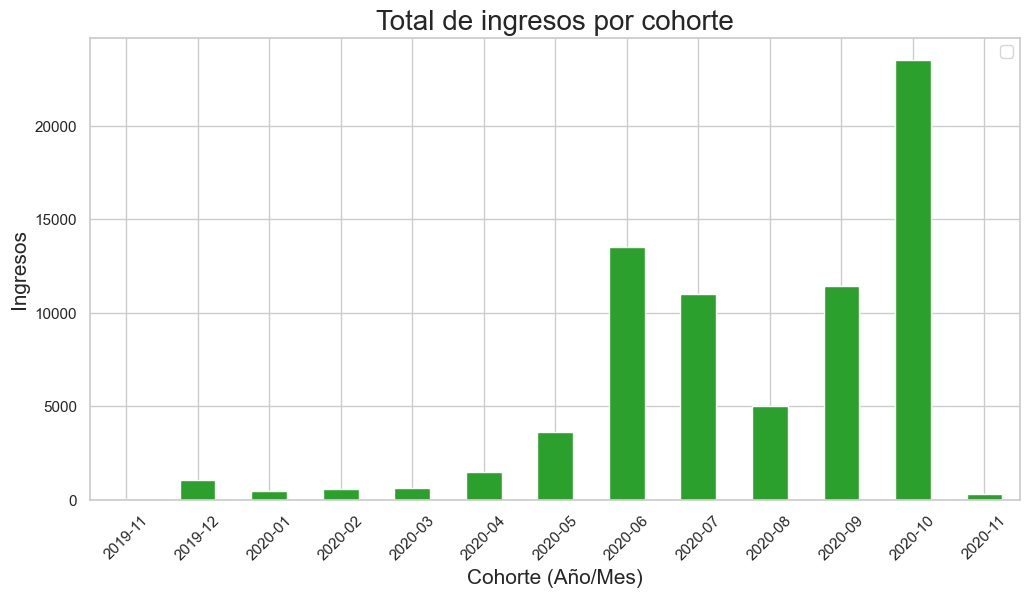

In [1183]:
# Gráfico total ingresos
plt.figure(figsize=(10, 6))
total_by_cohort.plot(kind="bar", color="tab:green")
plt.title("Total de ingresos por cohorte", fontsize=20)
plt.xlabel("Cohorte (Año/Mes)", fontsize=15)
plt.ylabel("Ingresos", fontsize=15)
plt.xticks(rotation=45)
plt.legend([])
plt.show()

#### Ingresos por cohorte en el tiempo (método A)

In [1173]:
# Ingresos por cohorte
# ingresos_by_cohort = ingresos[subset_ingresos].groupby(['fee_paid_at_month','cohorte'])['fee_total_amount'].sum().reset_index()
# ingresos_by_cohort.sort_values(by=['fee_paid_at_month','cohorte'])
# ingresos_by_cohort.set_index(['fee_paid_at_month','cohorte'], inplace=True)
# ingresos_by_cohort.rename(columns={'fee_total_amount': 'amount'}, inplace=True)
# ingresos_by_cohort.iloc[0:50]

ingresos_by_cohort = ingresos[subset_ingresos].groupby(['cohorte','fee_paid_at_month'])['fee_total_amount'].sum().reset_index()
ingresos_by_cohort.sort_values(by=['cohorte','fee_paid_at_month'])
ingresos_by_cohort.set_index(['cohorte','fee_paid_at_month'], inplace=True)
ingresos_by_cohort.rename(columns={'fee_total_amount': 'amount'}, inplace=True)
ingresos_by_cohort.iloc[0:20]

amount
cohorte fee_paid_at_month        
2019-11 2020-07               5.0
        2020-09              10.0
        2020-10              10.0
        2020-11               5.0
2019-12 2020-06              10.0
        2020-07              60.0
        2020-08             135.0
        2020-09             215.0
        2020-10             300.0
        2020-11             255.0
        2020-12              50.0
        2021-01              30.0
2020-01 2020-06              10.0
        2020-07              55.0
        2020-08              35.0
        2020-09              90.0
        2020-10             140.0
        2020-11              70.0
        2020-12              30.0
        2021-01              10.0

In [1174]:
# Iterar sobre las cohortes para calcular el total acumulado de ingresos
# for col in ingresos_by_cohort.columns:
#     if isinstance(col, tuple):
#         for col[0] in ingresos_by_cohort['cohorte']:
#             total_cohorte = ingresos_by_cohort[ingresos_by_cohort['cohorte'] == col[0]].groupby('fee_paid_at_month')['amount'].sum()
#             ingresos_by_cohort[ingresos_by_cohort['cohorte'] == col[0]]['total'] = total_cohorte
# ingresos_by_cohort['total_acumulado'] = 0
# ingresos_by_cohort.iloc[0:20]

In [1175]:
# Unstack multi-index para gráfico
# ingresos_for_plot = ingresos_by_cohort.unstack()
# ingresos_for_plot

ingresos_by_cohort = ingresos_by_cohort.unstack()
ingresos_by_cohort


amount                                                   \
fee_paid_at_month 2020-06 2020-07 2020-08 2020-09 2020-10  2020-11 2020-12   
cohorte                                                                      
2019-11               NaN     5.0     NaN    10.0    10.0      5.0     NaN   
2019-12              10.0    60.0   135.0   215.0   300.0    255.0    50.0   
2020-01              10.0    55.0    35.0    90.0   140.0     70.0    30.0   
2020-02              20.0    30.0    45.0   125.0   200.0    165.0     5.0   
2020-03              20.0    55.0    45.0   105.0   205.0    140.0    20.0   
2020-04              45.0   160.0   140.0   300.0   440.0    260.0   115.0   
2020-05             115.0   405.0   375.0   740.0  1025.0    650.0   220.0   
2020-06             490.0  1355.0  1190.0  2860.0  4010.0   2580.0   705.0   
2020-07               NaN   770.0  1125.0  2540.0  3425.0   2300.0   510.0   
2020-08               NaN     NaN   340.0  1420.0  1710.0   1230.0   210.0   
2020-09               NaN     NaN     NaN   760.0  5155.0   4250.0   865.0   
2020-10               NaN     NaN     NaN     NaN  4010.0  15500.0  3120.0   
2020-11               NaN     NaN     NaN     NaN     NaN    170.0   125.0   

                                   
fee_paid_at_month 2021-01 2021-02  
cohorte                            
2019-11               NaN     NaN  
2019-12              30.0     NaN  
2020-01              10.0     NaN  
2020-02               NaN     5.0  
2020-03               5.0     5.0  
2020-04              10.0     NaN  
2020-05              70.0    20.0  
2020-06             240.0   105.0  
2020-07             190.0   140.0  
2020-08             100.0    15.0  
2020-09             240.0   130.0  
2020-10             615.0   285.0  
2020-11              20.0     5.0

In [1146]:

# Aplanar columnas
#ingresos_for_plot.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in ingresos_for_plot.columns]
ingresos_by_cohort.columns = [col[1] if isinstance(col, tuple) else col for col in ingresos_by_cohort.columns]
ingresos_by_cohort.fillna(0, inplace=True)
ingresos_by_cohort


,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
cohorte,,,,,,,,,
2019-11,0.0,5.0,0.0,10.0,10.0,5.0,0.0,0.0,0.0
2019-12,10.0,60.0,135.0,215.0,300.0,255.0,50.0,30.0,0.0
2020-01,10.0,55.0,35.0,90.0,140.0,70.0,30.0,10.0,0.0
2020-02,20.0,30.0,45.0,125.0,200.0,165.0,5.0,0.0,5.0
2020-03,20.0,55.0,45.0,105.0,205.0,140.0,20.0,5.0,5.0
2020-04,45.0,160.0,140.0,300.0,440.0,260.0,115.0,10.0,0.0
2020-05,115.0,405.0,375.0,740.0,1025.0,650.0,220.0,70.0,20.0
2020-06,490.0,1355.0,1190.0,2860.0,4010.0,2580.0,705.0,240.0,105.0
2020-07,0.0,770.0,1125.0,2540.0,3425.0,2300.0,510.0,190.0,140.0


In [1176]:
# ingresos_by_cohort.unstack()
# ingresos_by_cohort


In [ ]:


# ingresos_by_cohort.columns = [col[1] if isinstance(col, tuple) else col for col in ingresos_by_cohort.columns]
# ingresos_by_cohort

# Preparar leyenda para gráfico
#legend_cohortes = [t[1] for t in requests_for_plot.columns]


<Figure size 1000x600 with 0 Axes>

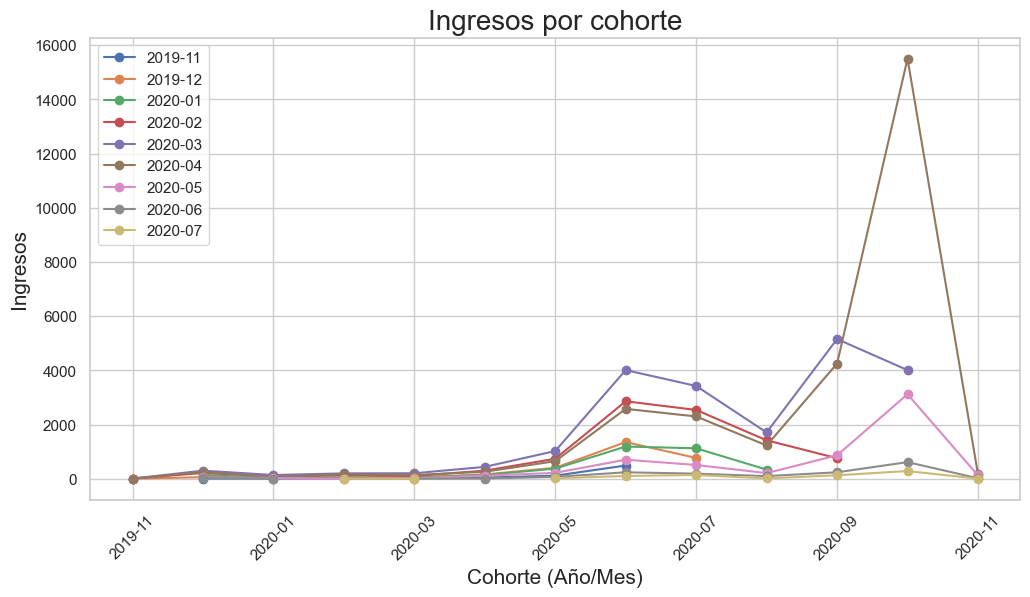

In [1177]:
# Crear gráfico!!!
plt.figure(figsize=(10, 6))
ingresos_by_cohort.plot(kind="line", marker="o")
plt.title("Ingresos por cohorte en el tiempo", fontsize=20)
plt.xlabel("Cohorte (Año/Mes)", fontsize=15)
plt.ylabel("Ingresos", fontsize=15)
plt.xticks(rotation=45)
plt.legend(legend_cohortes)
plt.show()

#### Ingresos por cohorte en el tiempo (método B)

In [1180]:
# Ingresos por cohorte
ingresos_by_cohort = ingresos[subset_ingresos].groupby(['fee_paid_at_month','cohorte'])['fee_total_amount'].sum().reset_index()
ingresos_by_cohort.sort_values(by=['fee_paid_at_month','cohorte'])
ingresos_by_cohort.set_index(['fee_paid_at_month','cohorte'], inplace=True)
ingresos_by_cohort.rename(columns={'fee_total_amount': 'amount'}, inplace=True)
ingresos_by_cohort.iloc[0:50]

# ingresos_by_cohort = ingresos[subset_ingresos].groupby(['cohorte','fee_paid_at_month'])['fee_total_amount'].sum().reset_index()
# ingresos_by_cohort.sort_values(by=['cohorte','fee_paid_at_month'])
# ingresos_by_cohort.set_index(['cohorte','fee_paid_at_month'], inplace=True)
# ingresos_by_cohort.rename(columns={'fee_total_amount': 'amount'}, inplace=True)
# ingresos_by_cohort.iloc[0:20]

amount
fee_paid_at_month cohorte        
2020-06           2019-12    10.0
                  2020-01    10.0
                  2020-02    20.0
                  2020-03    20.0
                  2020-04    45.0
                  2020-05   115.0
                  2020-06   490.0
2020-07           2019-11     5.0
                  2019-12    60.0
                  2020-01    55.0
                  2020-02    30.0
                  2020-03    55.0
                  2020-04   160.0
                  2020-05   405.0
                  2020-06  1355.0
                  2020-07   770.0
2020-08           2019-12   135.0
                  2020-01    35.0
                  2020-02    45.0
                  2020-03    45.0
                  2020-04   140.0
                  2020-05   375.0
                  2020-06  1190.0
                  2020-07  1125.0
                  2020-08   340.0
2020-09           2019-11    10.0
                  2019-12   215.0
                  2020-01    90.0
                  2020-02   125.0
                  2020-03   105.0
                  2020-04   300.0
                  2020-05   740.0
                  2020-06  2860.0
                  2020-07  2540.0
                  2020-08  1420.0
                  2020-09   760.0
2020-10           2019-11    10.0
                  2019-12   300.0
                  2020-01   140.0
                  2020-02   200.0
                  2020-03   205.0
                  2020-04   440.0
                  2020-05  1025.0
                  2020-06  4010.0
                  2020-07  3425.0
                  2020-08  1710.0
                  2020-09  5155.0
                  2020-10  4010.0
2020-11           2019-11     5.0
                  2019-12   255.0

In [ ]:
# Iterar sobre las cohortes para calcular el total acumulado de ingresos
# for col in ingresos_by_cohort.columns:
#     if isinstance(col, tuple):
#         for col[0] in ingresos_by_cohort['cohorte']:
#             total_cohorte = ingresos_by_cohort[ingresos_by_cohort['cohorte'] == col[0]].groupby('fee_paid_at_month')['amount'].sum()
#             ingresos_by_cohort[ingresos_by_cohort['cohorte'] == col[0]]['total'] = total_cohorte
# ingresos_by_cohort['total_acumulado'] = 0
# ingresos_by_cohort.iloc[0:20]

In [1181]:
# Unstack multi-index para gráfico
# ingresos_for_plot = ingresos_by_cohort.unstack()
# ingresos_for_plot

ingresos_by_cohort = ingresos_by_cohort.unstack()
ingresos_by_cohort


amount                                                  \
cohorte           2019-11 2019-12 2020-01 2020-02 2020-03 2020-04 2020-05   
fee_paid_at_month                                                           
2020-06               NaN    10.0    10.0    20.0    20.0    45.0   115.0   
2020-07               5.0    60.0    55.0    30.0    55.0   160.0   405.0   
2020-08               NaN   135.0    35.0    45.0    45.0   140.0   375.0   
2020-09              10.0   215.0    90.0   125.0   105.0   300.0   740.0   
2020-10              10.0   300.0   140.0   200.0   205.0   440.0  1025.0   
2020-11               5.0   255.0    70.0   165.0   140.0   260.0   650.0   
2020-12               NaN    50.0    30.0     5.0    20.0   115.0   220.0   
2021-01               NaN    30.0    10.0     NaN     5.0    10.0    70.0   
2021-02               NaN     NaN     NaN     5.0     5.0     NaN    20.0   

                                                                    
cohorte           2020-06 2020-07 2020-08 2020-09  2020-10 2020-11  
fee_paid_at_month                                                   
2020-06             490.0     NaN     NaN     NaN      NaN     NaN  
2020-07            1355.0   770.0     NaN     NaN      NaN     NaN  
2020-08            1190.0  1125.0   340.0     NaN      NaN     NaN  
2020-09            2860.0  2540.0  1420.0   760.0      NaN     NaN  
2020-10            4010.0  3425.0  1710.0  5155.0   4010.0     NaN  
2020-11            2580.0  2300.0  1230.0  4250.0  15500.0   170.0  
2020-12             705.0   510.0   210.0   865.0   3120.0   125.0  
2021-01             240.0   190.0   100.0   240.0    615.0    20.0  
2021-02             105.0   140.0    15.0   130.0    285.0     5.0

In [1182]:

# Aplanar columnas
#ingresos_for_plot.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in ingresos_for_plot.columns]
ingresos_by_cohort.columns = [col[1] if isinstance(col, tuple) else col for col in ingresos_by_cohort.columns]
ingresos_by_cohort.fillna(0, inplace=True)
ingresos_by_cohort


,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
fee_paid_at_month,,,,,,,,,,,,,
2020-06,0.0,10.0,10.0,20.0,20.0,45.0,115.0,490.0,0.0,0.0,0.0,0.0,0.0
2020-07,5.0,60.0,55.0,30.0,55.0,160.0,405.0,1355.0,770.0,0.0,0.0,0.0,0.0
2020-08,0.0,135.0,35.0,45.0,45.0,140.0,375.0,1190.0,1125.0,340.0,0.0,0.0,0.0
2020-09,10.0,215.0,90.0,125.0,105.0,300.0,740.0,2860.0,2540.0,1420.0,760.0,0.0,0.0
2020-10,10.0,300.0,140.0,200.0,205.0,440.0,1025.0,4010.0,3425.0,1710.0,5155.0,4010.0,0.0
2020-11,5.0,255.0,70.0,165.0,140.0,260.0,650.0,2580.0,2300.0,1230.0,4250.0,15500.0,170.0
2020-12,0.0,50.0,30.0,5.0,20.0,115.0,220.0,705.0,510.0,210.0,865.0,3120.0,125.0
2021-01,0.0,30.0,10.0,0.0,5.0,10.0,70.0,240.0,190.0,100.0,240.0,615.0,20.0
2021-02,0.0,0.0,0.0,5.0,5.0,0.0,20.0,105.0,140.0,15.0,130.0,285.0,5.0


In [ ]:
# ingresos_by_cohort.unstack()
# ingresos_by_cohort


In [ ]:


# ingresos_by_cohort.columns = [col[1] if isinstance(col, tuple) else col for col in ingresos_by_cohort.columns]
# ingresos_by_cohort

# Preparar leyenda para gráfico
#legend_cohortes = [t[1] for t in requests_for_plot.columns]


<Figure size 1000x600 with 0 Axes>

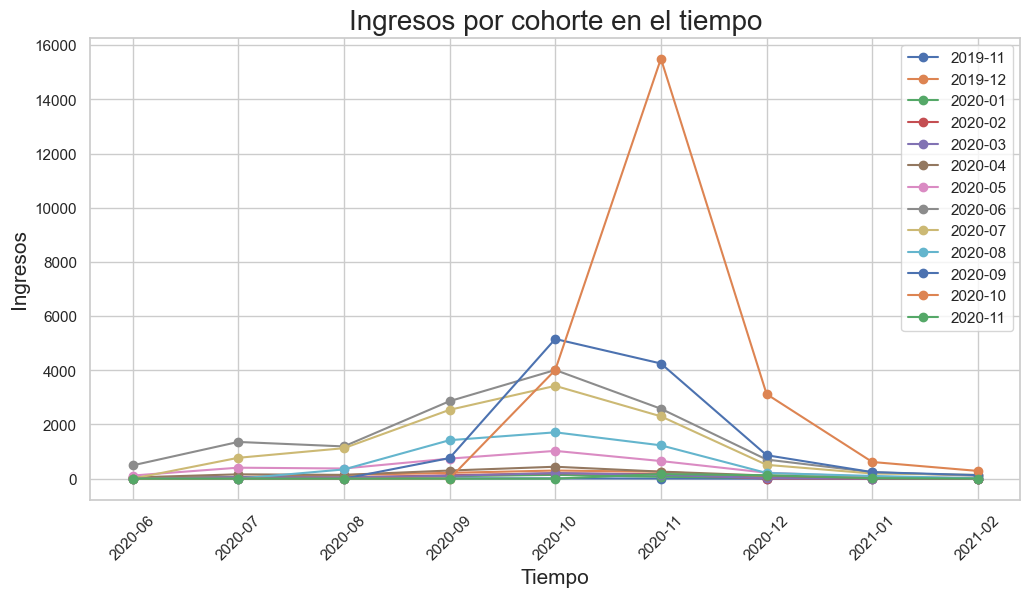

In [1185]:
# Crear gráfico!!!
plt.figure(figsize=(10, 6))
ingresos_by_cohort.plot(kind="line", marker="o")
plt.title("Ingresos por cohorte en el tiempo", fontsize=20)
plt.xlabel("Tiempo", fontsize=15)
plt.ylabel("Ingresos", fontsize=15)
plt.xticks(rotation=45)
plt.legend(legend_cohortes)
plt.show()